In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/WHR-2024-5CS037.csv")

#Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
- Data Exploration and Understanding:
- Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [35]:
print(df.head(10))
print("\nNumber of rows and columns are ",df.shape)
print("\n",df.dtypes)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [36]:
print("Mean of Score: ",df['score'].mean())
print("Median of Score: ",df['score'].median())
print("Standard Deviation of Score: ",df['score'].std())
print("Country with the highest happiness score: ",df.loc[df['score'].idxmax(),'Country name'])
print("Country with the lowest happiness score: ",df.loc[df['score'].idxmin(),'Country name'])

Mean of Score:  5.52758041958042
Median of Score:  5.785
Standard Deviation of Score:  1.1707165099442995
Country with the highest happiness score:  Finland
Country with the lowest happiness score:  Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [37]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].median())

missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Country name                    0
score                           0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [38]:
filtered_dataset=df[df['score']>7.5]
sorted_dataset=filtered_dataset.sort_values(by='Log GDP per capita', ascending=False).head(10)
print(sorted_dataset)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [39]:
conditions=[
    df['score']<4,
    (df['score']>=4)&(df['score']<=6),
    df['score']>6,
]

classes=['Low','Medium','High']
df['Happiness_Category']=np.select(conditions,classes)
print(df[['Country name','score','Happiness_Category']].head(10))

  Country name  score Happiness_Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


2. Data Visualizations:

    • Bar Plot: Plot the top 10 happiest
    countries by Score using a bar chart.

    • Line Plot: Plot the top 10 unhappiest
  countries by Score using a Line chart.

    • Plot a histogram for the Score column to show its distribution and also interpret.

    • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

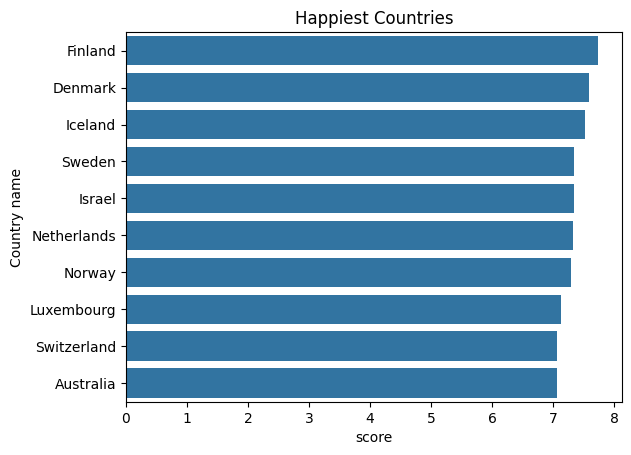

In [40]:
happiest_countries=df.nlargest(10,'score')
sns.barplot(x='score',y='Country name', data=happiest_countries)
plt.title("Happiest Countries")
plt.show()

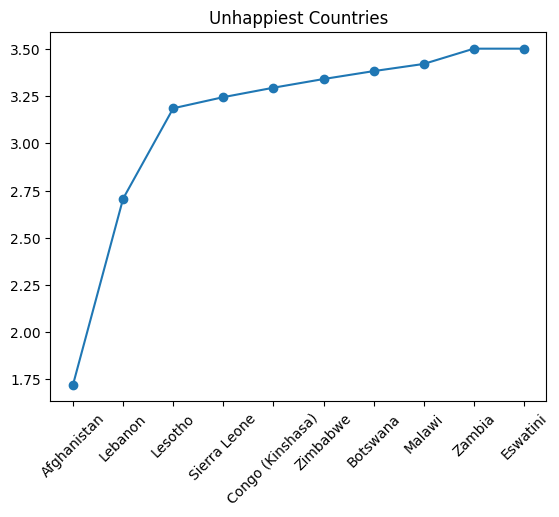

In [41]:
unhappiest_countries=df.nsmallest(10,'score')
plt.plot(unhappiest_countries['Country name'],unhappiest_countries['score'],marker="o")
plt.title("Unhappiest Countries")
plt.xticks(rotation=45)
plt.show()

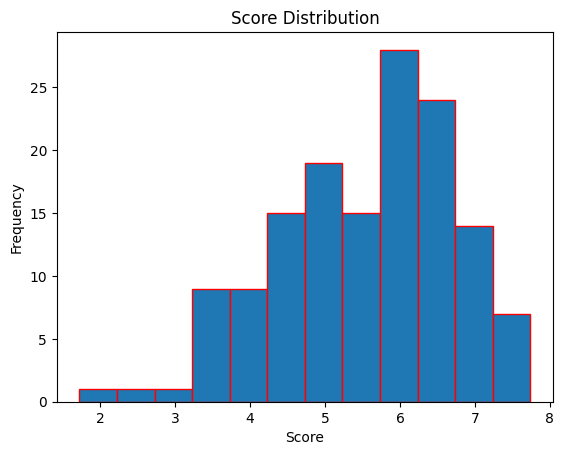

In [42]:
df['score'].plot(kind='hist', bins=12, edgecolor='red')
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


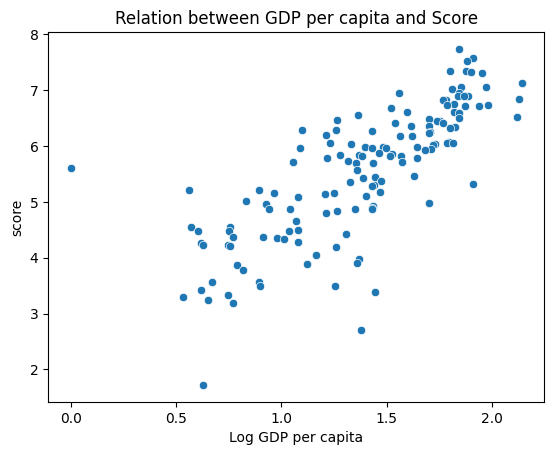

In [43]:
sns.scatterplot(x='Log GDP per capita',y='score',data=df)
plt.title("Relation between GDP per capita and Score")
plt.show()

#3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:

    south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [44]:
south_asia_countries_list = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]
filtered_south_asia_df = df[df['Country name'].isin(south_asia_countries_list)]
filtered_south_asia_df.to_csv("/content/drive/MyDrive/Dataset/South_Asian_Countries.csv", index=False)


#Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

         Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [45]:
# Create a composite score for South Asian countries
filtered_south_asia_df['Composite_Score'] = (
    0.4 * filtered_south_asia_df['Log GDP per capita'] +
    0.3 * filtered_south_asia_df['Social support'] +
    0.3 * filtered_south_asia_df['Healthy life expectancy']
)

# Sort the DataFrame based on the composite score
sorted_south_asia_df = filtered_south_asia_df.sort_values(by='Composite_Score', ascending=False)

# Display the results with country name and composite score
print(sorted_south_asia_df[['Country name', 'Composite_Score']])


    Country name  Composite_Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-45-3c0e9f925013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_south_asia_df['Composite_Score'] = (


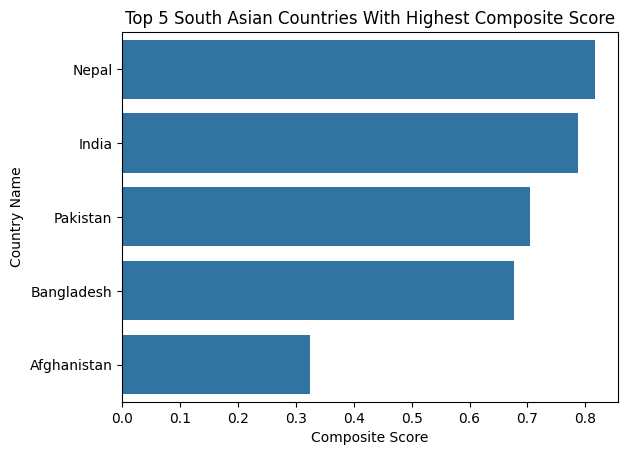

In [46]:
# Select the top 5 South Asian countries with the highest Composite Score
top_5_countries = sorted_south_asia_df.nlargest(5, 'Composite_Score')

# Create a bar plot for the top 5 countries
sns.barplot(x='Composite_Score', y='Country name', data=top_5_countries)
plt.title("Top 5 South Asian Countries With Highest Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country Name")
plt.show()


#Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [47]:
# Calculate Q1, Q3, and IQR for score
q1_score, q3_score = np.percentile(sorted_south_asia_df['score'], [25, 75])
iqr_score = q3_score - q1_score
min_score = q1_score - 1.5 * iqr_score
max_score = q3_score + 1.5 * iqr_score

# Calculate Q1, Q3, and IQR for Log_GDP_per_capita
q1_gdp, q3_gdp = np.percentile(sorted_south_asia_df['Log GDP per capita'], [25, 75])
iqr_gdp = q3_gdp - q1_gdp
min_gdp = q1_gdp - 1.5 * iqr_gdp
max_gdp = q3_gdp + 1.5 * iqr_gdp

# Identify outliers based on score and Log GDP per capita
outliers = sorted_south_asia_df[
    (sorted_south_asia_df['score'] < min_score) |
    (sorted_south_asia_df['score'] > max_score) |
    (sorted_south_asia_df['Log GDP per capita'] < min_gdp) |
    (sorted_south_asia_df['Log GDP per capita'] > max_gdp)
]
print("Outliers:\n", outliers[['Country name', 'score', 'Log GDP per capita']])


Outliers:
     Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


#Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Correlation between Score and Freedom to make life choices: 0.80


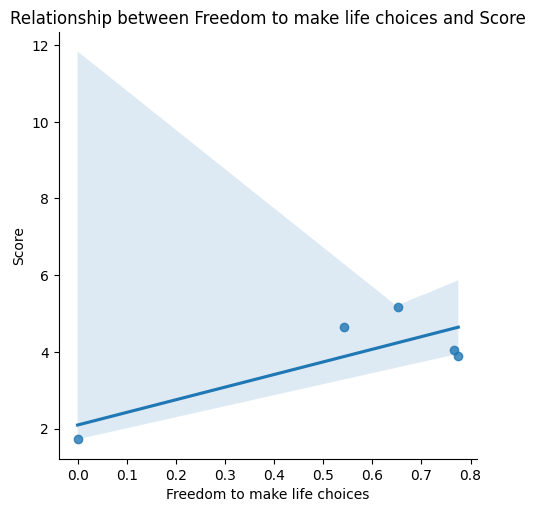

Correlation between Score and Generosity: 0.88


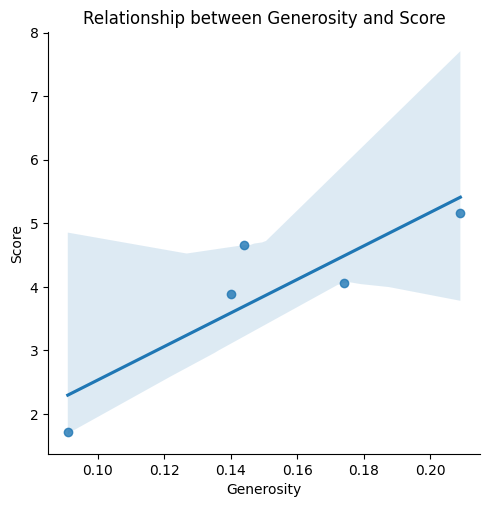


Summary of Correlations:
Freedom to make life choices: 0.80
Generosity: 0.88

Strongest Relationship: Generosity (Correlation: 0.88)
Weakest Relationship: Freedom to make life choices (Correlation: 0.80)


In [48]:
metrics = ['Freedom to make life choices', 'Generosity']

# Calculate correlations and generate scatter plots with trendlines
correlations = {}
for metric in metrics:
    # Calculate Pearson correlation
    correlation = sorted_south_asia_df['score'].corr(sorted_south_asia_df[metric])
    correlations[metric] = correlation
    print(f"Correlation between Score and {metric}: {correlation:.2f}")

    # Create scatter plot with regression line
    sns.lmplot(x=metric, y='score', data=sorted_south_asia_df)
    plt.title(f"Relationship between {metric} and Score")
    plt.xlabel(metric)
    plt.ylabel("Score")
    plt.show()

# Identify the strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

# Display results
print("\nSummary of Correlations:")
for metric, corr in correlations.items():
    print(f"{metric}: {corr:.2f}")

print(f"\nStrongest Relationship: {strongest_metric} (Correlation: {correlations[strongest_metric]:.2f})")
print(f"Weakest Relationship: {weakest_metric} (Correlation: {correlations[weakest_metric]:.2f})")


#Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Ascending Ranking:
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093

Descending Ranking:
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


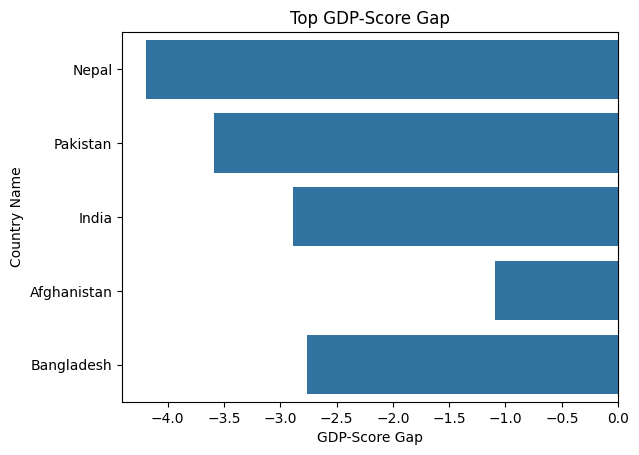

In [32]:
sorted_south_asia_df['GDP-Score Gap'] = sorted_south_asia_df['Log GDP per capita'] - sorted_south_asia_df['score']

gap_asc = sorted_south_asia_df.sort_values(by='GDP-Score Gap')
gap_desc = sorted_south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Print the ascending and descending rankings
print("Ascending Ranking:\n", gap_asc[['Country name', 'GDP-Score Gap']])
print("\nDescending Ranking:\n", gap_desc[['Country name', 'GDP-Score Gap']])

# Select the top 3 countries with the smallest and largest GDP-Score Gap
top_gaps = pd.concat([gap_asc.head(3), gap_desc.head(3)])

sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps)
plt.title("Top GDP-Score Gap")
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.show()


##3.3 Problem - 3 - Comparative Analysis:
#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [49]:
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
                         "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_eastern_countries_df = df[df['Country name'].isin(middle_eastern_countries)]

1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [50]:
south_asia_mean = sorted_south_asia_df['score'].mean()
south_asia_std = sorted_south_asia_df['score'].std()

middle_east_mean = middle_eastern_countries_df['score'].mean()
middle_east_std = middle_eastern_countries_df['score'].std()
print(f"South Asia - Mean: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Compare which region has higher happiness scores on average
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has higher happiness scores on average.")
else:
    print("\nMiddle East has higher happiness scores on average.")

South Asia - Mean: 3.90, Standard Deviation: 1.32
Middle East - Mean: 5.41, Standard Deviation: 1.57

Middle East has higher happiness scores on average.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

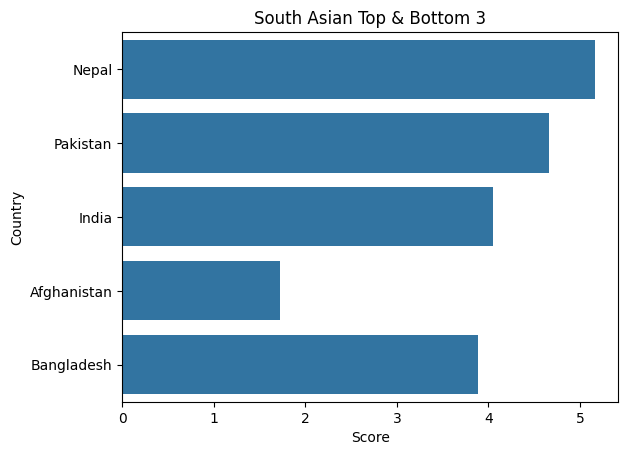

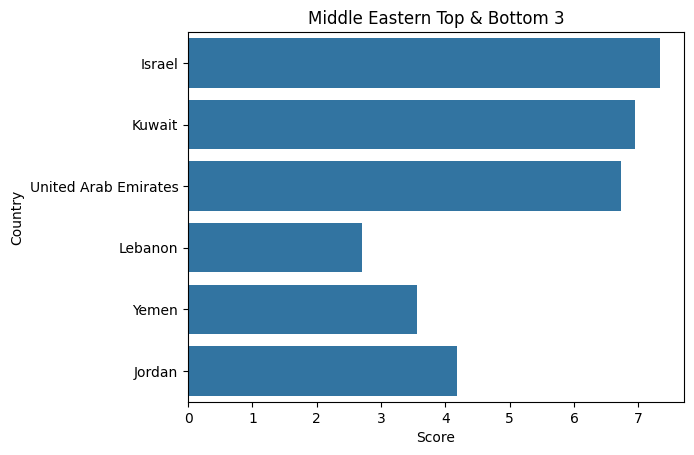

In [51]:
# Concatenate top 3 and bottom 3 countries for South Asia based on 'score'
south_asia_top_bottom = pd.concat([filtered_south_asia_df.nlargest(3, 'score'), filtered_south_asia_df.nsmallest(3, 'score')])

# Concatenate top 3 and bottom 3 countries for Middle East based on 'score'
middle_east_top_bottom = pd.concat([middle_eastern_countries_df.nlargest(3, 'score'), middle_eastern_countries_df.nsmallest(3, 'score')])

# Plot bar chart for South Asia Top and Bottom 3 countries
sns.barplot(x='score', y='Country name', data=south_asia_top_bottom)
plt.title("South Asian Top & Bottom 3")
plt.xlabel("Score")
plt.ylabel("Country")
plt.show()

# Plot bar chart for Middle East Top and Bottom 3 countries
sns.barplot(x='score', y='Country name', data=middle_east_top_bottom)
plt.title("Middle Eastern Top & Bottom 3")
plt.xlabel("Score")
plt.ylabel("Country")
plt.show()


3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

<ipython-input-52-345e5adafbe8>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Metric', y='Value', hue='Region', data=melted_comparison_df, ci=None)


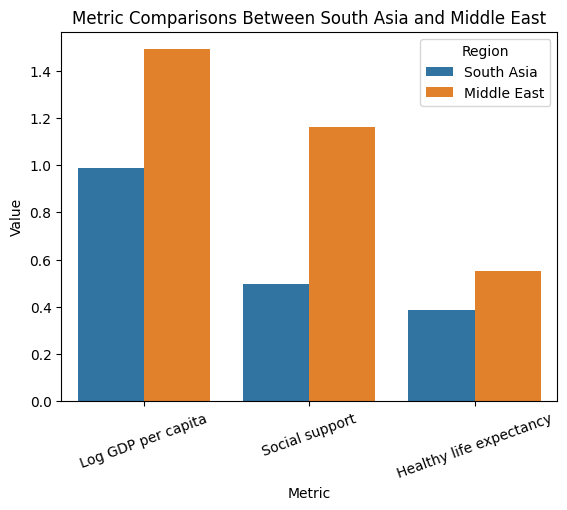

In [52]:
# List of metrics for comparison
key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Combine South Asian and Middle Eastern dataframes with a 'Region' column
regional_comparison_df = pd.concat([
    sorted_south_asia_df[key_metrics + ['Country name']].assign(Region='South Asia'),
    middle_eastern_countries_df[key_metrics + ['Country name']].assign(Region='Middle East')
])

# Reshape the dataframe for grouped bar chart visualization
melted_comparison_df = pd.melt(regional_comparison_df, id_vars=['Country name', 'Region'], var_name='Metric', value_name='Value')

# Create a grouped bar chart for metric comparisons
sns.barplot(x='Metric', y='Value', hue='Region', data=melted_comparison_df, ci=None)
plt.title("Metric Comparisons Between South Asia and Middle East")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.legend(title="Region")
plt.xticks(rotation=20)
plt.show()


4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [53]:
print("South Asia Range:", sorted_south_asia_df['score'].max()-sorted_south_asia_df['score'].min())
print("Middle East Range:", middle_eastern_countries_df['score'].max()-middle_eastern_countries_df['score'].min())
print("South Asia CV:", sorted_south_asia_df['score'].std()/sorted_south_asia_df['score'].mean())
print("Middle East CV:", middle_eastern_countries_df['score'].std()/middle_eastern_countries_df['score'].mean())

South Asia Range: 3.4370000000000003
Middle East Range: 4.634
South Asia CV: 0.33785236845097644
Middle East CV: 0.28938880812119405


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

South Asia Correlation between Score and Freedom to make life choices: 0.80


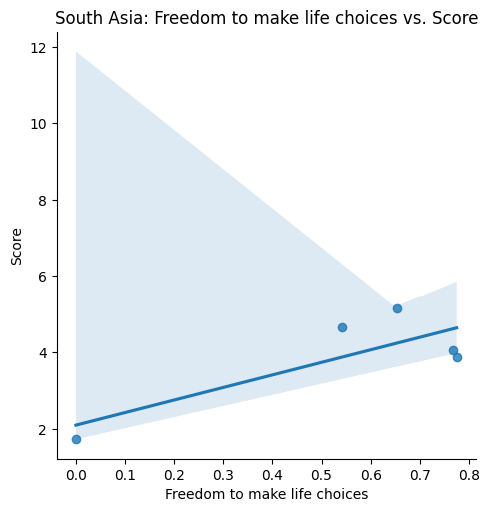

South Asia Correlation between Score and Generosity: 0.88


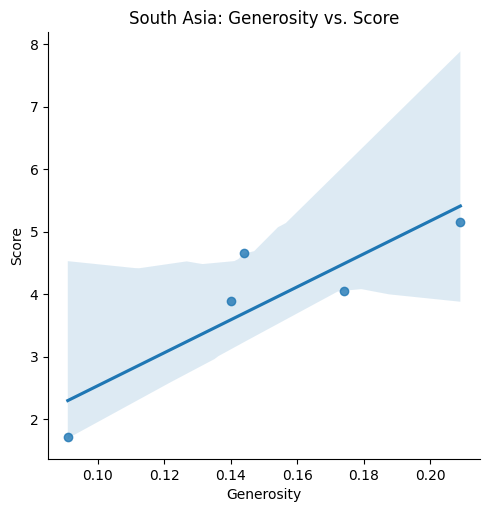

Middle East Correlation between Score and Freedom to make life choices: 0.87


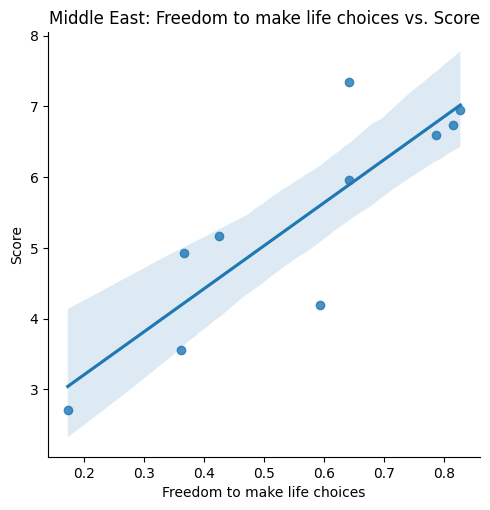

Middle East Correlation between Score and Generosity: 0.62


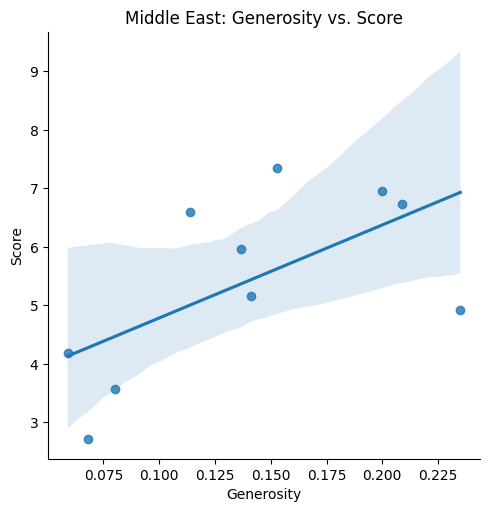

In [54]:
metrics = ['Freedom to make life choices', 'Generosity']

for region_name, region_data in zip(['South Asia', 'Middle East'], [sorted_south_asia_df, middle_eastern_countries_df]):
    for metric_name in metrics:
        # Calculate correlation between Score and the metric
        metric_correlation = region_data['score'].corr(region_data[metric_name])
        print(f"{region_name} Correlation between Score and {metric_name}: {metric_correlation:.2f}")

        # Create scatter plot with trendline
        sns.lmplot(x=metric_name, y='score', data=region_data)
        plt.title(f"{region_name}: {metric_name} vs. Score")
        plt.xlabel(metric_name)
        plt.ylabel("Score")
        plt.show()


6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

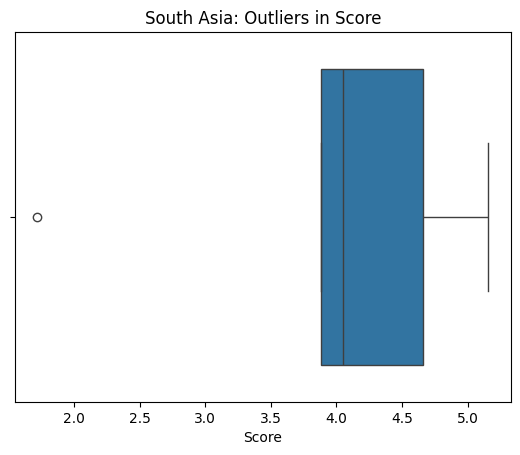

South Asia Outliers based on Score:
     Country name  score
142  Afghanistan  1.721


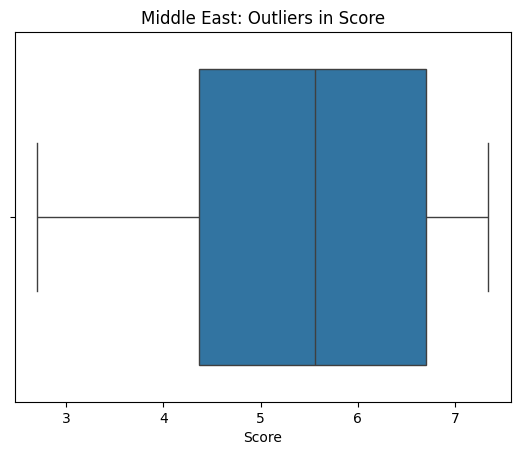

Middle East Outliers based on Score:
 Empty DataFrame
Columns: [Country name, score]
Index: []


In [55]:
for region_name, region_data in zip(['South Asia', 'Middle East'], [sorted_south_asia_df, middle_eastern_countries_df]):
    # Calculate Q1, Q3, and IQR for Score
    q1_score, q3_score = np.percentile(region_data['score'], [25, 75])
    iqr_score = q3_score - q1_score

    # Define thresholds for outliers
    lower_bound_score = q1_score - 1.5 * iqr_score
    upper_bound_score = q3_score + 1.5 * iqr_score

    # Identify outliers based on Score
    score_outliers = region_data[(region_data['score'] < lower_bound_score) | (region_data['score'] > upper_bound_score)]

    # Plot the boxplot to visualize outliers in Score
    sns.boxplot(x=region_data['score'])
    plt.title(f"{region_name}: Outliers in Score")
    plt.xlabel("Score")
    plt.show()

    print(f"{region_name} Outliers based on Score:\n", score_outliers[['Country name', 'score']])


7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

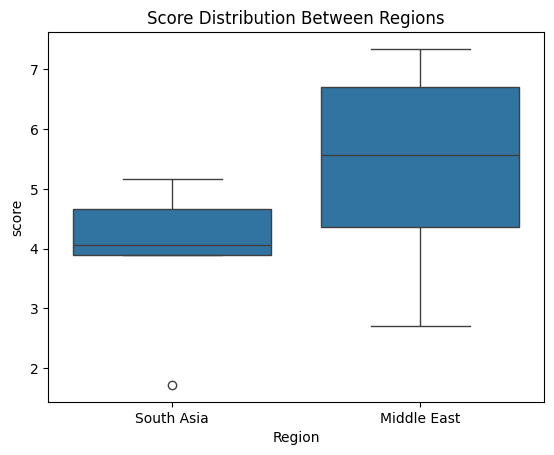

In [56]:
comparison_df = pd.concat([
    sorted_south_asia_df[['score']].assign(Region='South Asia'),
    middle_eastern_countries_df[['score']].assign(Region='Middle East')
])

sns.boxplot(x='Region', y='score', data=comparison_df)
plt.title("Score Distribution Between Regions")
plt.show()